In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [201]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [203]:
df['Age']=df.Age.fillna(value=df.Age.median())

#not enough values for cabin

In [204]:
df.shape

(891, 12)

In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [206]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [207]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [208]:
group_names = ['Child','Adult','Senior']
bins = [0,17,65,100]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=group_names)

In [209]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


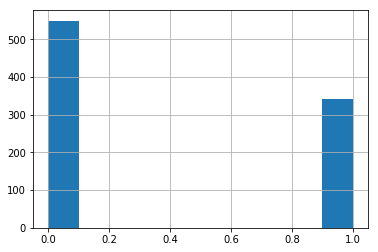

In [210]:
y.hist()

In [211]:
Age_Group = pd.get_dummies(df.Age_Group)
df = pd.concat([df, Age_Group], axis=1)

In [212]:
Sex = pd.get_dummies(df.Sex)
df = pd.concat([df, Sex], axis=1)

In [213]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Child,Adult,Senior,female,male
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.024874,0.023195,0.003516,-0.042939,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.122239,-0.104791,-0.050661,0.543351,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.125620,-0.104503,-0.063635,-0.131900,0.131900
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.595143,0.493113,0.308695,-0.081163,0.081163
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.324068,-0.305330,-0.034374,0.114631,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.317670,-0.300231,-0.030317,0.245489,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.007546,0.009702,-0.008612,0.182333,-0.182333
Child,-0.024874,0.122239,0.125620,-0.595143,0.324068,0.317670,-0.007546,1.000000,-0.961396,-0.036276,0.107150,-0.107150
Adult,0.023195,-0.104791,-0.104503,0.493113,-0.305330,-0.300231,0.009702,-0.961396,1.000000,-0.240114,-0.084749,0.084749
Senior,0.003516,-0.050661,-0.063635,0.308695,-0.034374,-0.030317,-0.008612,-0.036276,-0.240114,1.000000,-0.070217,0.070217


In [214]:
y= df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [215]:
X = df.drop(columns= ['Survived','Name','male','Sex','PassengerId','Age_Group','Ticket','Cabin','Fare','Embarked'])
X.head(10)

,Pclass,Age,SibSp,Parch,Child,Adult,Senior,female
0,3,22.0,1,0,0,1,0,0
1,1,38.0,1,0,0,1,0,1
2,3,26.0,0,0,0,1,0,1
3,1,35.0,1,0,0,1,0,1
4,3,35.0,0,0,0,1,0,0
5,3,28.0,0,0,0,1,0,0
6,1,54.0,0,0,0,1,0,0
7,3,2.0,3,1,1,0,0,0
8,3,27.0,0,2,0,1,0,1
9,2,14.0,1,0,1,0,0,1


In [216]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     83.49
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           5.03e-93
Time:                        00:39:32   Log-Likelihood:                -395.66
No. Observations:                 891   AIC:                             807.3
Df Residuals:                     883   BIC:                             845.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.1803      0.017    -10.922      0.000      -0.213      -0.148
Age           -0.0039      0.001     -2.842      0.005      -0.007      -0.001
SibSp         -0.0463      0.013     -3.557      0.000      -0.072      -0.021
Parch         -0.0244      0.018     -1.347      0.178      -0.060       0.011
Child          0.8839      0.065     13.505      0.000       0.755       1.012
Adult          0.7508      0.070     10.728      0.000       0.613       0.888
Senior         0.7306      0.175      4.184      0.000       0.388       1.073
female         0.5150      0.028     18.492      0.000       0.460       0.570
==============================================================================
Omnibus:                       37.368   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.047
Skew:                           0.520   Prob(JB):                     1.22e-09
Kurtosis:                       3.156   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [218]:
X_train.shape, X_test.shape

((596, 8), (295, 8))

In [219]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [220]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [221]:
model.score(X_test, y_test)

0.8203389830508474

In [222]:
y_hat = results.predict(X_test)
y_hat

709    0.029158
439    0.268393
840    0.131377
720    0.990337
39     0.756755
290    0.983319
300    0.614933
333    0.187566
208    0.795212
136    0.961940
137    0.378748
696    0.037025
485    0.451527
244    0.092063
344    0.248737
853    1.131285
621    0.359091
653    0.614933
886    0.284119
110    0.385754
294    0.115651
447    0.436861
192    0.603996
682    0.131377
538    0.099926
819    0.115937
30     0.413273
673    0.268393
63     0.139525
396    0.603139
         ...   
456    0.314990
500    0.276273
430    0.460449
445    0.639005
650    0.099926
172    0.783413
450    0.153520
314    0.150449
332    0.396686
801    0.712633
90     0.095995
834    0.139239
181    0.280187
581    0.861443
795    0.236943
69     0.015150
131    0.131377
334    0.929137
597    0.017368
135    0.299844
164    0.129449
28     0.614933
783    0.004709
193    0.440805
869    0.256612
715    0.135308
525    0.050784
381    0.805283
140    0.566035
173    0.127445
Length: 295, dtype: floa

In [223]:
r2_score(y_test, y_hat)

0.46716833764938936